## Covid-19 Vaccines Sentiment Analysis

#### Problem Statement


We will be doing a sentiment analysis for COVID-19 vaccines using data from COVID-19 All Vaccines Tweets. 

The goal of this analysis is to identify and extract subjective information from text data, such as opinions, 
attitudes, and emotions.


In [30]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import re
import string
from collections import Counter

# The below libraries are imported for natural language processing
import nltk
from nltk.corpus import stopwords 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TRUST_DATA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TRUST_DATA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#load dataset
df = pd.read_csv("vaccination_dataset.csv")

In [32]:
# view top five rows
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [33]:
#view bottom five rows
df.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
189049,1435274147353927702,Markets Today,"Tamil Nadu, India",Latest news from Indian Stock markets and Glob...,2012-05-04 13:48:33,9846,57,43331,False,2021-09-07 16:09:57,Dr Reddy's Laboratories said it initiated supp...,NaN,Twitter for Android,0,0,False
189050,1435273895267897344,Rajalingam,India,NaN,2011-08-16 07:39:43,56,73,289,False,2021-09-07 16:08:57,@drreddys Wn will #SputnikV arrive in Assam?? ...,"['SputnikV', 'assamcovidupdate']",Twitter for Android,0,0,False
189051,1435273812572921857,Mint,India,Breaking news and analyses of Indian and world...,2008-11-27 09:07:38,1984949,69,510,True,2021-09-07 16:08:37,Dr Reddy's Laboratories said it initiated supp...,NaN,Twitter Web App,3,10,False
189052,1435266518753824773,LatestLY,"Mumbai, India","https://t.co/UVDtERUJlr focuses on the What, W...",2017-02-07 05:41:28,70920,348,132,True,2021-09-07 15:39:38,COVID-19 Vaccine Update: Dr Reddy's Start Supp...,['COVID19Vaccine'],TweetDeck,0,0,False
189053,1435263139470188545,PINAK SHUKLA🇮🇳,"Ahmadabad City, India","SR. REPORTER, SR.PRODUCER - TV9 - GUJARATI, DE...",2009-10-14 10:30:47,1737,1142,6424,False,2021-09-07 15:26:13,"In India, #SputnikV vaccine is administered in...",['SputnikV'],Twitter for Android,0,0,False


In [34]:
#Data shape

df.shape

(189054, 16)

In [35]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189054 entries, 0 to 189053
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                189054 non-null  int64 
 1   user_name         189053 non-null  object
 2   user_location     131226 non-null  object
 3   user_description  175630 non-null  object
 4   user_created      189054 non-null  object
 5   user_followers    189054 non-null  int64 
 6   user_friends      189054 non-null  int64 
 7   user_favourites   189054 non-null  int64 
 8   user_verified     189054 non-null  bool  
 9   date              189054 non-null  object
 10  text              189054 non-null  object
 11  hashtags          149728 non-null  object
 12  source            188935 non-null  object
 13  retweets          189054 non-null  int64 
 14  favorites         189054 non-null  int64 
 15  is_retweet        189054 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [36]:
#check missing value
df.isnull().sum()

id                      0
user_name               1
user_location       57828
user_description    13424
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            39326
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [37]:
#Dataset columns
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [38]:
#Summary Statistics
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.890540e+05,1.890540e+05,189054.000000,1.890540e+05,189054.000000,189054.000000
mean,1.398598e+18,9.320023e+04,988.347948,1.201100e+04,2.448840,10.588250
std,2.332464e+16,8.138659e+05,5136.875260,3.894753e+04,46.237536,163.940527
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.379500e+18,7.100000e+01,31.000000,5.800000e+01,0.000000,0.000000
50%,1.402297e+18,3.700000e+02,236.000000,1.030000e+03,0.000000,0.000000
75%,1.418398e+18,1.571000e+03,803.000000,7.369000e+03,1.000000,2.000000
max,1.438232e+18,1.606963e+07,516578.000000,1.221784e+06,11288.000000,25724.000000


In [39]:
#Check Duplicate
df.nunique()

id                  189054
user_name            74824
user_location        22754
user_description     72871
user_created         76062
user_followers       19934
user_friends          7643
user_favourites      34767
user_verified            2
date                183317
text                187336
hashtags             51625
source                 333
retweets               412
favorites              911
is_retweet               1
dtype: int64

#### For our analysis, we will select relevant columns to create new dataframe (which are date, username, and text)

In [40]:
# create new dataframe
New_df = df[["user_name", "date", "text"]]

In [41]:
New_df.head()

,user_name,date,text
0,Rachel Roh,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...
1,Albert Fong,2020-12-13 16:27:13,While the world has been on the wrong side of ...
2,eli🇱🇹🇪🇺👌,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,Charles Adler,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're..."
4,Citizen News Channel,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...


In [42]:
# Top 5 rows
New_df.shape

(189054, 3)

In [43]:
# convert "user_name" to categorical data type
New_df.user_name = New_df["user_name"].astype("category")

# Represent categorical data with numeric
New_df.user_name = New_df.user_name.cat.codes

In [44]:
# covert "date" column to datetime
New_df.date = pd.to_datetime(New_df.date).dt.date

In [45]:
New_df.head()

,user_name,date,text
0,46287,2020-12-20,Same folks said daikon paste could treat a cyt...
1,3122,2020-12-13,While the world has been on the wrong side of ...
2,65442,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,11315,2020-12-12,"Facts are immutable, Senator, even when you're..."
4,12317,2020-12-12,Explain to me again why we need a vaccine @Bor...


Now that we are done creating our new dataframe, we can cont. with our analysis


**Processing of the Data**

In [46]:
# Extract "text" from new dataframe
texts = New_df["text"]

In [47]:
# Top 5 rows
texts.head()

0    Same folks said daikon paste could treat a cyt...
1    While the world has been on the wrong side of ...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3    Facts are immutable, Senator, even when you're...
4    Explain to me again why we need a vaccine @Bor...
Name: text, dtype: object

In [48]:
# Bottom 5 rows
texts.tail()

189049    Dr Reddy's Laboratories said it initiated supp...
189050    @drreddys Wn will #SputnikV arrive in Assam?? ...
189051    Dr Reddy's Laboratories said it initiated supp...
189052    COVID-19 Vaccine Update: Dr Reddy's Start Supp...
189053    In India, #SputnikV vaccine is administered in...
Name: text, dtype: object

In [49]:
# Remove url from text column
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr.head()

0    Same folks said daikon paste could treat a cyt...
1    While the world has been on the wrong side of ...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3    Facts are immutable, Senator, even when you're...
4    Explain to me again why we need a vaccine @Bor...
Name: text, dtype: object

In [50]:
# Convert all text to lower case
text_lower = lambda x : x.lower()
texts_lc = texts_lr.apply(text_lower)
texts_lc.head()

0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2    #coronavirus #sputnikv #astrazeneca #pfizerbio...
3    facts are immutable, senator, even when you're...
4    explain to me again why we need a vaccine @bor...
Name: text, dtype: object

In [51]:
# Remove punctuation from text 
rmv_pcs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
texts_pcs = texts_lc.apply(rmv_pcs)
texts_pcs.head()

0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts are immutable senator even when youre no...
4    explain to me again why we need a vaccine bori...
Name: text, dtype: object

In [52]:
# Remove common words from text (e.g and, at, the, a, etc)
update_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', 
                '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(update_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_rs = texts_pcs.apply(remove_words)
texts_rs.head()

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    sputnikv astrazeneca pfizerbiontech moderna ru...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
Name: text, dtype: object

In [53]:
word_list = [word for line in texts_rs for word in line.split()]
word_list[:10]

['folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'cytokine',
 'storm',
 'pfizerbiontech',
 'world']

In [54]:
# Count words to know most common word in text
word_counts = Counter(word_list).most_common()
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']


# plot top 50 most common words
px.bar(words_df.head(50), x='word', y='freq', title='Most Common Words')

In [55]:
# save "common_words" file as csv
words_df.to_csv("Common_words.csv")

In [56]:
New_df["text"] = texts_rs

In [57]:
New_df.head()

,user_name,date,text
0,46287,2020-12-20,folks said daikon paste could treat cytokine s...
1,3122,2020-12-13,world wrong side history year hopefully bigges...
2,65442,2020-12-12,sputnikv astrazeneca pfizerbiontech moderna ru...
3,11315,2020-12-12,facts immutable senator even youre ethically s...
4,12317,2020-12-12,explain need vaccine borisjohnson matthancock ...


In [58]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189054 entries, 0 to 189053
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_name  189054 non-null  int32 
 1   date       189054 non-null  object
 2   text       189054 non-null  object
dtypes: int32(1), object(2)
memory usage: 3.6+ MB


In [59]:
New_df['date'] = pd.to_datetime(New_df['date'], format='%Y-%m-%d')


In [60]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189054 entries, 0 to 189053
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_name  189054 non-null  int32         
 1   date       189054 non-null  datetime64[ns]
 2   text       189054 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 3.6+ MB


In [61]:
New_df.head()

,user_name,date,text
0,46287,2020-12-20,folks said daikon paste could treat cytokine s...
1,3122,2020-12-13,world wrong side history year hopefully bigges...
2,65442,2020-12-12,sputnikv astrazeneca pfizerbiontech moderna ru...
3,11315,2020-12-12,facts immutable senator even youre ethically s...
4,12317,2020-12-12,explain need vaccine borisjohnson matthancock ...


In [62]:
# Data from "2021-03-01"
filtered_df = New_df.loc[(New_df['date'] >= '2021-03-01')]

In [63]:
filtered_df

,user_name,date,text
11708,8701,2021-03-01,energy sinovac philippinegeneralhospital covid...
11783,56649,2021-03-01,azn times astrazeneca sold stake moderna 1 bil...
11932,42555,2021-03-01,visionary leader leading front proud h’ble pm ...
11933,56054,2021-03-01,appreciable pmmodi taking covaxin 👇 😂
11934,66169,2021-03-01,mugdha46 find slots registering names portal u...
...,...,...,...
189049,35982,2021-09-07,dr reddys laboratories said initiated supply f...
189050,46672,2021-09-07,drreddys wn sputnikv arrive assam himantabiswa...
189051,38043,2021-09-07,dr reddys laboratories said initiated supply f...
189052,32438,2021-09-07,vaccine update dr reddys start supply sputnik ...


#### Sentiment Analysis

Now that we have finished preparing the data for our analysis, we can continue with our sentiment analysis. Sentiment Analysis can be organized into neutral, positive, or negative sentiment. To find out, we will be using SentimentIntensityAnalyzer, which will rate whether the tweet containt positive, negative, or neutral sentiment.

In [64]:
# Organize into neural, positive, or negative
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = filtered_df.text.apply(ps)
sentiment_scores

11708     {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
11783     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11932     {'neg': 0.0, 'neu': 0.629, 'pos': 0.371, 'comp...
11933     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11934     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
189049    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
189050    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
189051    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
189052    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
189053    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 173521, dtype: object

In [65]:
# create new dataframe from sentiment dataset
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.0,0.588,0.412,0.2732
1,0.0,1.000,0.000,0.0000
2,0.0,0.629,0.371,0.7579
3,0.0,1.000,0.000,0.0000
4,0.0,1.000,0.000,0.0000


In [66]:
# create "label" column from compound column
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.0,0.588,0.412,0.2732,positive
1,0.0,1.000,0.000,0.0000,neutral
2,0.0,0.629,0.371,0.7579,positive
3,0.0,1.000,0.000,0.0000,neutral
4,0.0,1.000,0.000,0.0000,neutral


In [67]:
# join "label" column to main dataframe
data = filtered_df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
11708,8701,2021-03-01,energy sinovac philippinegeneralhospital covid...,positive
11783,56649,2021-03-01,azn times astrazeneca sold stake moderna 1 bil...,positive
11932,42555,2021-03-01,visionary leader leading front proud h’ble pm ...,neutral
11933,56054,2021-03-01,appreciable pmmodi taking covaxin 👇 😂,negative
11934,66169,2021-03-01,mugdha46 find slots registering names portal u...,positive


In [68]:
# Save the clean dataset as csv file
data.to_csv("Clean_Covid19_DataSet.csv", index=False)

In [69]:
# value count label
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,neutral,83075
1,positive,52289
2,negative,22624


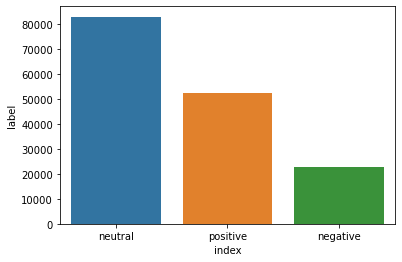

In [70]:
#plot bar chart of label column
sns.barplot(data=counts_df, x='index', y='label');

In [71]:
# group dataframe by date and label
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
data_agg.head()

,date,label,counts
0,2021-03-01,negative,578
1,2021-03-01,neutral,1149
2,2021-03-01,positive,1184
3,2021-03-02,negative,168
4,2021-03-02,neutral,354


In [72]:
# plot to see label across date
px.line(data_agg, x='date', y='counts', color='label', title='COVID-19 Vaccines Sentiment Analysis')

From the visualization, we can see that the sentiment of the tweets about COVID-19 Vaccines is mostly neutral. Although there are negative tweets about the vaccines, the positive tweets about the vaccines outweight the negative tweets.